In [252]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
n=1000
m=int(n/5)
p=int(m)

In [253]:
## value of a and inverse cdf F^{-1} as x1 corresponding to class I matrices
def a1(m):
    m1=5/np.sqrt(m)
    return m1/(np.exp(-m1)-np.exp(-5))


def x1(m,u,a):   #u comes from U[0,1]
    m2=np.sqrt(m)/5
    m3=np.exp(-1/m2) - u/(m2*a)
    return -m2*(np.log(m3))

In [254]:
## value of a and inverse cdf F^{-1} as x2 corresponding to class II matrices
def a2(m):
    m1=5/np.sqrt(m)
    return m1/(np.exp(5)-np.exp(m1))

def x2(m,u,a):
    m2=np.sqrt(m)/5
    m4=u/(m2*a)+np.exp(1/m2)
    return m2*(np.log(m4))

In [255]:
## inverse cdf F^{-1} as x3 corresponding to class matrices
def x3(m,u):
    return 1+u*(np.sqrt(m)-1)

## Generation of matrices in class I

In [256]:
def matrix_1(m,n,p):
  A=np.random.rand(m,n)
  B=np.random.rand(n,p)
  P=np.zeros(n)
  a_1=a1(m)#a from class I matrices
  S=0# initialize the normalizing factor
  X1=np.zeros(n)
  X2=np.zeros(n)
 
  for k in range(n):
    U1=np.random.uniform(0,1)
    U2=np.random.uniform(0,1)
    X1[k]=x1(m,U1,a_1)
    X2[k]=x1(m,U2,a_1)
    A[:, k] = X1[k] * A[:, k] / np.linalg.norm(A[:, k])
    B[k, :] = X2[k] * B[k, :] / np.linalg.norm(B[k, :])
    P[k]=X1[k]*X2[k]
    S=S+P[k]  
  P=P/S #vector containing probability for different samples
  return A,B,P,X1

(1000,)
1.0000000000000002


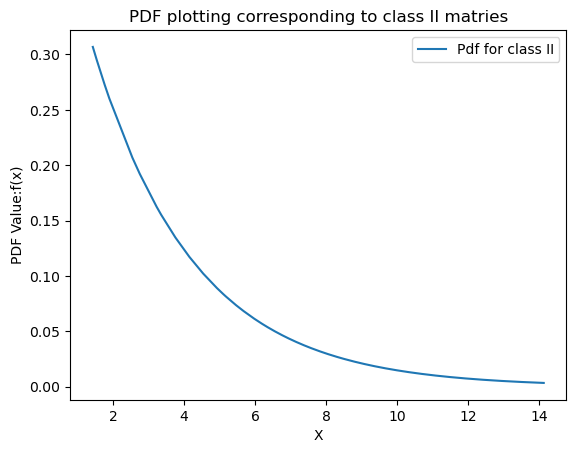

In [257]:
#PDF plotting corresponding to class I matries
_,_,P1,X_1=matrix_2(m,n,p)
#print(A)
print(P1.shape)
print(sum(P1))

X_1.sort()
a = a1(m)
pdf1 = np.zeros(len(X_1))
for i in range(len(X_1)):
    pdf1[i]=a*math.exp((-5*X_1[i])/(math.sqrt(m)))

plt.plot(X_1, pdf1, label="Pdf for class II")
plt.title("PDF plotting corresponding to class II matries")
plt.xlabel("X")
plt.ylabel("PDF Value:f(x)")
plt.legend()

## Generation of matrices in class II

In [258]:
def matrix_2(m,n,p):
  A=np.random.rand(m,n)
  B=np.random.rand(n,p)
  P=np.zeros(n)
  a_2=a2(m)#a from class II matrices
  S=0# initialize the normalizing factor
  X1=np.zeros(n)
  X2=np.zeros(n)

  for k in range(n):
    U1=np.random.uniform(0,1)
    U2=np.random.uniform(0,1)
    X1[k]=x2(m,U1,a_2)
    X2[k]=x2(m,U2,a_2)
    A[:, k] = X1[k] * A[:, k] / np.linalg.norm(A[:, k])
    B[k, :] = X2[k] * B[k, :] / np.linalg.norm(B[k, :])
    P[k]=X1[k]*X2[k]
    S=S+P[k]  
  P=P/S #vector containing probability for different samples
  return A,B,P,X1

(1000,)
1.0000000000000007


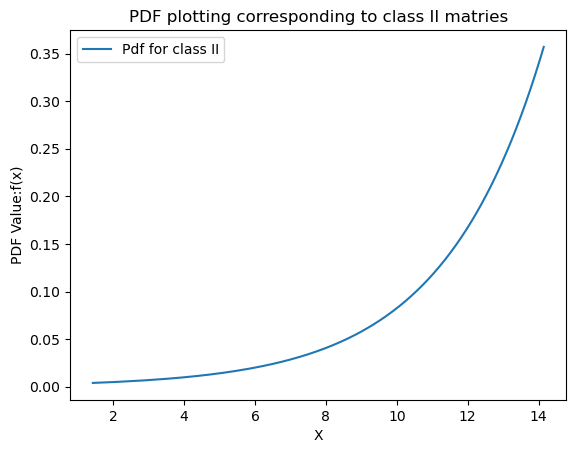

In [259]:
#PDF plotting corresponding to class II matries
_,_,P2,X2=matrix_2(m,n,p)
#print(A)
print(P2.shape)
print(sum(P2))

X2.sort()
a = a2(m)
pdf2 = np.zeros(len(X2))
for i in range(len(X2)):
    pdf2[i] = a * math.exp((5 * X2[i]) / math.sqrt(m))

plt.plot(X2, pdf2, label="Pdf for class II")
plt.title("PDF plotting corresponding to class II matries")
plt.xlabel("X")
plt.ylabel("PDF Value:f(x)")
plt.legend()

## Generation of matrices of classes III

In [260]:
def matrix_3(m,n,p):
              A=np.random.rand(m,n) #
              B=np.random.rand(n,p)
              P=np.zeros(n)
              S=0  # initialize the normalizing factor
              X1=np.zeros(n)
              X2=np.zeros(n) 

              for k in range(n):
                U1=np.random.uniform(0,1)
                U2=np.random.uniform(0,1)
                X1[k]=x3(m,U1)
                X2[k]=x3(m,U2)
                A[:, k] = X1[k] * A[:, k] / np.linalg.norm(A[:, k])
                B[k, :] = X2[k] * B[k, :] / np.linalg.norm(B[k, :])
                P[k]=X1[k]*X2[k]
                S=S+P[k]  
              P=P/S #vector containing probability for different samples
              return A,B,P,X1

(1000,)
0.999999999999999


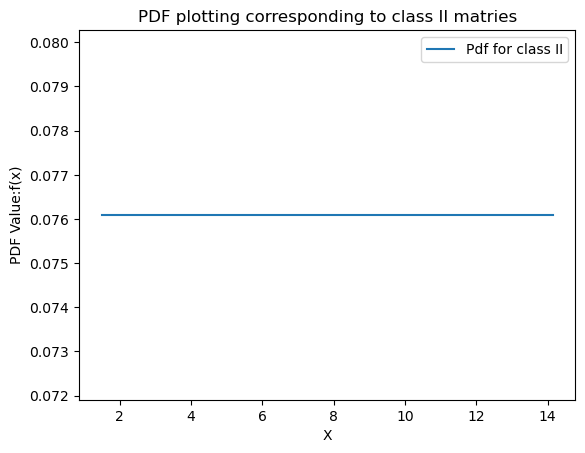

In [261]:
#PDF plotting corresponding to class II matries
_,_,P3,X3=matrix_2(m,n,p)
#print(A)
print(P3.shape)
print(sum(P3))
X3.sort()
pdf3 = np.zeros(len(X3))
for i in range(len(X3)):
    pdf3[i] = 1/(np.sqrt(m)-1)

plt.plot(X3, pdf3, label="Pdf for class II")
plt.title("PDF plotting corresponding to class II matries")
plt.xlabel("X")
plt.ylabel("PDF Value:f(x)")
plt.legend()

## Function for matrix multiplication and to compute error

In [262]:
def randomized_matrix_product(c, P, A, B):
    m, n = A.shape
    n, p = B.shape
    M = np.zeros((m, p))
    t = 0
    while t < c:
        k = np.random.randint(0,n)
        u = np.random.uniform(0, 1)
        if max(P) * u < P[k]:
            t += 1
            M += np.outer(A[:, k],B[k, :]) / (c*P[k])
    E = np.linalg.norm(M - np.matmul(A,B), 'fro') / np.linalg.norm(np.matmul(A,B), 'fro')
    return M,E

In [263]:

# c=0.01*10
# # n=10
# # m=n
# # p=m
# #M,E=randomized_matrix_product(c, P, A, B)
# #print(M)
# print(E)

## values of the dimension n vs Relative error plot for three class of matrices with different sampling coeffcient

 for matrix type= 0 when c_n= 0.01 n= [100, 200, 500, 1000] then relative error array=
 [0.86159636 0.61377416 0.38905074 0.27643675]
 for matrix type= 0 when c_n= 0.05 n= [100, 200, 500, 1000] then relative error array=
 [0.38507025 0.27708192 0.1755156  0.12419114]
 for matrix type= 0 when c_n= 0.2 n= [100, 200, 500, 1000] then relative error array=
 [0.19669564 0.13877824 0.08731363 0.0616853 ]
 for matrix type= 1 when c_n= 0.01 n= [100, 200, 500, 1000] then relative error array=
 [0.86269336 0.6325091  0.39209218 0.2785395 ]
 for matrix type= 1 when c_n= 0.05 n= [100, 200, 500, 1000] then relative error array=
 [0.38615535 0.27201391 0.17220702 0.1249235 ]
 for matrix type= 1 when c_n= 0.2 n= [100, 200, 500, 1000] then relative error array=
 [0.19449027 0.14592841 0.08879419 0.0624546 ]
 for matrix type= 2 when c_n= 0.01 n= [100, 200, 500, 1000] then relative error array=
 [0.87302436 0.60817083 0.39942941 0.27759464]
 for matrix type= 2 when c_n= 0.05 n= [100, 200, 500, 1000] then

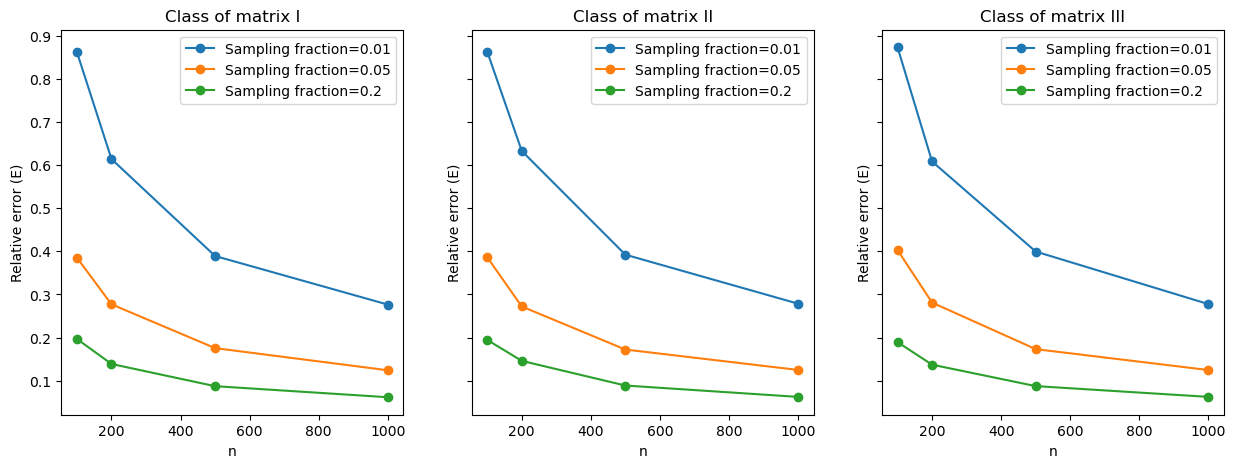

In [270]:
n=[100,200,500,1000]


sample_fractions = [0.01, 0.05, 0.2]
num_runs = 10
fig, axs = plt.subplots(1,3, figsize=(15, 5), sharey=True)

for matrix_type in range(3):
    if matrix_type == 0:
        get_matrix = matrix_1
        title = "Class of matrix I"
    elif matrix_type == 1:
        get_matrix = matrix_2
        title = "Class of matrix II"
    else:
        get_matrix = matrix_3
        title = "Class of matrix III"

    for c_n in sample_fractions:
        y = np.zeros(len(n))
        for i, matrix_size in enumerate(n):
            c = int(c_n * matrix_size)
            A, B, P, X = get_matrix(matrix_size, matrix_size, matrix_size)
            for k in range(num_runs):
                M,E = randomized_matrix_product(c, P, A, B)
#                 E =np.linalg.norm(M - np.matmul(A,B), 'fro') / np.linalg.norm(np.matmul(A,B), 'fro')
                y[i] += E
            y[i] /= num_runs
        print(" For matrix type=",matrix_type,"when c_n=",c_n,"n=", n,"then relative error array=\n",y)  
        axs[matrix_type].plot(n, y, label=f"Sampling fraction={c_n}", marker="o")
        axs[matrix_type].set_title(title)
        axs[matrix_type].set_xlabel("n")
        axs[matrix_type].set_ylabel("Relative error (E)")
        axs[matrix_type].legend()

plt.show()